In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

from Cluster import Cluster
from IncDBSCAN import IncrementalDBSCAN
from DatasetPattern import DatasetPattern
from utils import initDataset

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=1, random_state=24
)

X = StandardScaler().fit_transform(X)

In [3]:
X_del = X[:750]
X_add = X[750:]
print(len(X_add))
print(len(X_del))

250
750


In [4]:
start_time = time.time()
db = DBSCAN(eps=0.3, min_samples=10).fit(X_add)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
elapsed_time = time.time() - start_time
print("elapsed_time: {}[sec]".format(elapsed_time))

elapsed_time: 0.001733541488647461[sec]


In [5]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 0


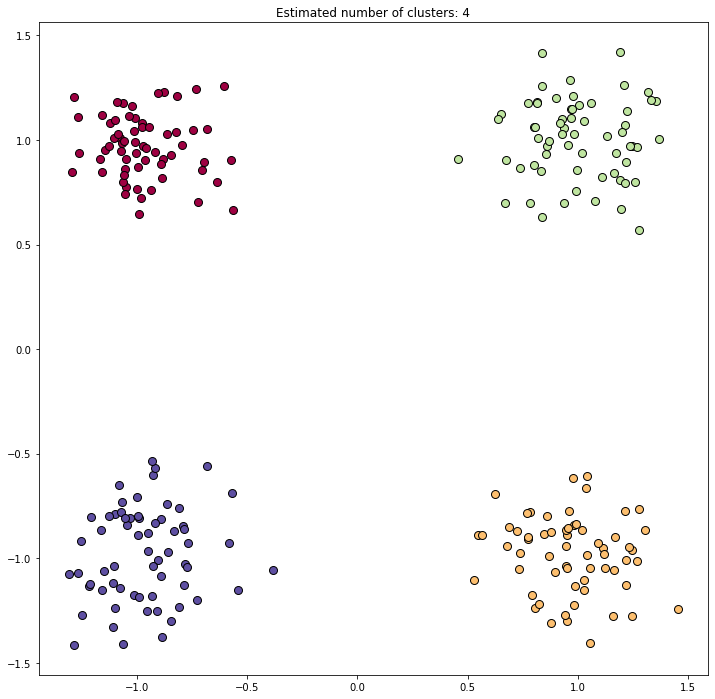

In [6]:
fig = plt.figure(figsize=(12.0, 12.0))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_add[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

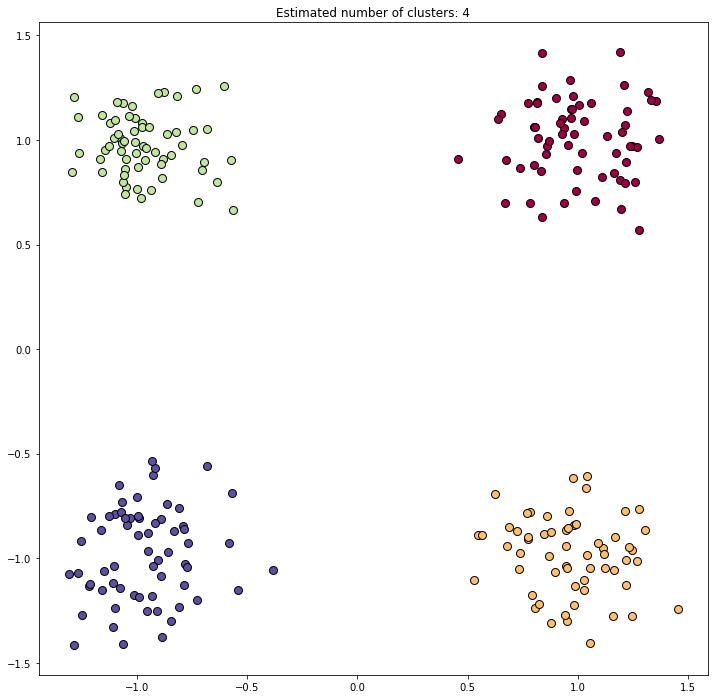

In [7]:
X_add2 = X_add[3:]
db = DBSCAN(eps=0.3, min_samples=10).fit(X_add2)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels2 = db.labels_
fig = plt.figure(figsize=(12.0, 12.0))
unique_labels2 = set(labels2)
colors2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]
for k, col in zip(unique_labels2, colors2):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask2 = labels2 == k

    xy = X_add2[class_member_mask2]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [8]:
#np.random.shuffle(X)
Xinc = initDataset(X)
start_time = time.time()
incDBSCAN = IncrementalDBSCAN(minpts=10,eps=0.3)
for p in Xinc:
    clu = incDBSCAN.fit(p)
for i in range(750):
    print("remove: {}".format(i))
    incDBSCAN.remove(i)
    print()
elapsed_time = time.time() - start_time
clustersList = incDBSCAN.getClustersList()
print("Incremental DBSCAN Results")
print("==========================")
print("")
incDBSCAN.printClustersInformation()
print("")
print("Runtime = {}[sec]".format(elapsed_time))
print("EPS = {}".format(0.3))
print("Minpts = {}".format(10))

remove: 0
Nonsplit Reduction

remove: 1
Nonsplit Reduction

remove: 2
Nonsplit Reduction

remove: 3
Nonsplit Reduction

remove: 4
Nonsplit Reduction

remove: 5
Nonsplit Reduction

remove: 6
Nonsplit Reduction

remove: 7
Nonsplit Reduction

remove: 8
Nonsplit Reduction

remove: 9
Nonsplit Reduction

remove: 10
Nonsplit Reduction

remove: 11
Nonsplit Reduction

remove: 12
Nonsplit Reduction

remove: 13
Nonsplit Reduction

remove: 14
Nonsplit Reduction

remove: 15
Nonsplit Reduction

remove: 16
Nonsplit Reduction

remove: 17
Nonsplit Reduction

remove: 18
Nonsplit Reduction

remove: 19
Nonsplit Reduction

remove: 20
Nonsplit Reduction

remove: 21
Nonsplit Reduction

remove: 22
Nonsplit Reduction

remove: 23
Nonsplit Reduction

remove: 24
Nonsplit Reduction

remove: 25
Nonsplit Reduction

remove: 26
Nonsplit Reduction

remove: 27
Nonsplit Reduction

remove: 28
Nonsplit Reduction

remove: 29
Nonsplit Reduction

remove: 30
Nonsplit Reduction

remove: 31
Nonsplit Reduction

remove: 32
Nonspli

In [9]:
inc_labels = np.array(incDBSCAN.getLabels())
inc_n_clusters_ = len(set(inc_labels)) - (1 if -1 in inc_labels else 0)
inc_n_noise_ = list(inc_labels).count(-1)

In [10]:
len(inc_labels)

250

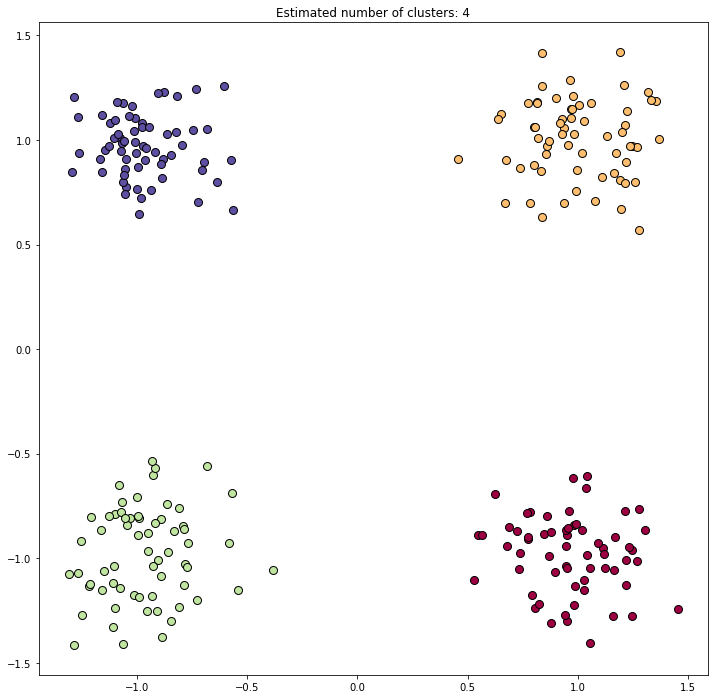

In [11]:
fig = plt.figure(figsize=(12.0, 12.0))
inc_unique_labels = set(inc_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(inc_unique_labels))]
for k, col in zip(inc_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    inc_class_member_mask = inc_labels == k

    inc_xy = X_add[inc_class_member_mask]
    plt.plot(
        inc_xy[:, 0],
        inc_xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % inc_n_clusters_)
plt.show()

In [12]:
inc_unique_labels

{0, 1, 2, 3}

[-0.98950574  0.64822572]


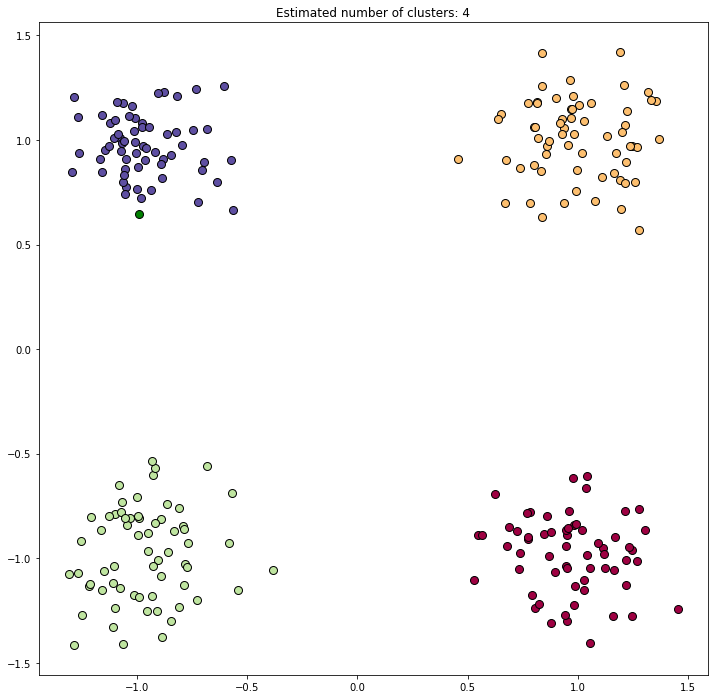

In [13]:
fig = plt.figure(figsize=(12.0, 12.0))
inc_unique_labels = set(inc_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(inc_unique_labels))]
for k, col in zip(inc_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    inc_class_member_mask = inc_labels == k

    X_tmp = X_add[1:]
    inc_xy = X_tmp[inc_class_member_mask[1:]]
    plt.plot(
        inc_xy[:, 0],
        inc_xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

next_delete = X_add[0]
print(next_delete)
plt.plot(next_delete[0],
         next_delete[1],
         "o",
         markerfacecolor="g",
         markeredgecolor="k",
         markersize=8,)
    
plt.title("Estimated number of clusters: %d" % inc_n_clusters_)
plt.show()